In [1]:
from tensorflow import keras

from tensorflow.keras import models, layers #type:ignore
 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

from tqdm import tqdm
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
# Preparing the dataset and creating the features and target arrays

n_sims = 10000

x = []
y = []

for i in tqdm(range(n_sims), desc='Carregando dados', ascii=True):
    data = np.load(f'../input31/data_{i+1}.npy')
    x.append(data[:, :2])
    y.append(data[0, 2])  # equivalente a data[:, 2:][0][0]

x = np.array(x)
y = np.array(y)

norm = y.max()
# Normalização
# y /= y.max()


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25)

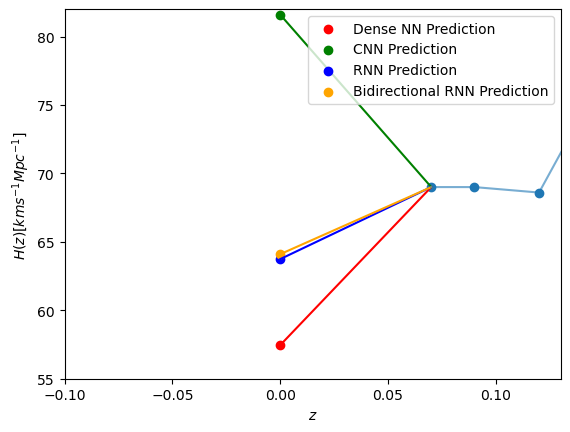

In [27]:
# forecasting "real" H(0)

real = np.load('input31/data_real31.npy')
# real = real[real[:, 1].argsort()]

real = real.reshape(-1,31,2)






plt.scatter(x=[0], y=57.46, color='red', label='Dense NN Prediction')
plt.scatter(x=[0], y=81.59, color='green', label='CNN Prediction')
plt.scatter(x=[0], y=63.74, color='blue', label='RNN Prediction')
plt.scatter(x=[0], y=64.10, color='orange', label='Bidirectional RNN Prediction')


plt.plot([0, 0.07], [57.46, 69], color='red')
plt.plot([0, 0.07], [81.59, 69], color='green')
plt.plot([0, 0.07], [63.74, 69], color='blue')
plt.plot([0, 0.07], [64.10, 69], color='orange')


plt.scatter(real[:, :, 0][0], real[:, :, 1][0])
plt.plot(real[:, :, 0][0], real[:, :, 1][0], alpha=.6)

plt.xlabel(r'$z$')
plt.ylabel(r'$H (z)$[$km s^{-1} Mpc^{-1}$] ')

plt.xlim(-0.1, .13)
plt.ylim(55, 82)

plt.legend()

plt.show()

In [19]:
real[0][0]

array([ 0.07, 69.  ])